In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
csv_list = ['logistic_regression/cohen_kappa.csv','linear_SVM/cohen_kappa.csv','kernel_SVM/cohen_kappa.csv']
df_list = []

for csv in csv_list:
    df = pd.read_csv(csv, header=[0,1], index_col=[0])
    df_list.append(df)
    
for i, df in enumerate(df_list):
    df = df.drop(columns=['tilted','frontal'], level=1)
    df = df.droplevel(level=1, axis=1)
    df_list[i] = df

df = pd.read_csv('LSTM/cohen_kappa.csv', index_col=[0], skiprows=[1])
df_list.append(df)

df = pd.read_csv('dummy_classifier/cohen_kappa.csv', header=[0,1], index_col=[0])
df = df.drop(columns=['tilted','frontal'], level=1)
df_list.append(df)

df = pd.concat(df_list, axis=1, sort=False)

columns_arrays = [
    ['Logistic regression','Logistic regression','Logistic regression','Logistic regression','Linear SVM','Linear SVM','Linear SVM','Linear SVM','Kernel SVM','Kernel SVM','Kernel SVM','Kernel SVM','LSTM','LSTM','LSTM','LSTM','Dummy classifier','Dummy classifier','Dummy classifier','Dummy classifier'],
    ['delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations'],
]

columns_index = pd.MultiIndex.from_arrays(columns_arrays, names=['Modelli', 'Features'])
index = ['anger','disgust','fear','happiness','sadness','surprise','valence']

weighted_avg_df = pd.DataFrame(data=df.values, index=index, columns=columns_index)
weighted_avg_df

Modelli   Logistic regression                                \
Features             delaunay au_intensities au_activations   
anger                    0.09           0.05           0.12   
disgust                  0.02           0.15           0.08   
fear                     0.06           0.05           0.03   
happiness                0.18           0.31           0.30   
sadness                 -0.02           0.10           0.10   
surprise                 0.10           0.09           0.11   
valence                  0.11           0.22           0.24   

Modelli                              Linear SVM                                \
Features  au_intensities_activations   delaunay au_intensities au_activations   
anger                           0.09       0.09           0.08           0.07   
disgust                         0.06       0.13           0.15           0.03   
fear                            0.01       0.02           0.04           0.01   
happiness                       0.33       0.25           0.31           0.32   
sadness                         0.11       0.03           0.14           0.07   
surprise                        0.22       0.08           0.10           0.11   
valence                         0.19       0.07           0.23           0.17   

Modelli                              Kernel SVM                                \
Features  au_intensities_activations   delaunay au_intensities au_activations   
anger                           0.14       0.03           0.09          -0.03   
disgust                         0.04      -0.06           0.08          -0.04   
fear                           -0.00       0.05           0.01           0.01   
happiness                       0.33       0.05           0.11           0.34   
sadness                         0.12       0.05           0.02           0.09   
surprise                        0.22       0.00           0.01           0.06   
valence                         0.22      -0.01           0.04           0.27   

Modelli                                  LSTM                                \
Features  au_intensities_activations delaunay au_intensities au_activations   
anger                           0.05     0.02           0.08           0.03   
disgust                        -0.00    -0.01           0.08           0.02   
fear                            0.01     0.00           0.04           0.01   
happiness                       0.30     0.08           0.33           0.26   
sadness                         0.06     0.01           0.04          -0.06   
surprise                        0.12     0.01           0.10           0.11   
valence                         0.11     0.07           0.18           0.16   

Modelli                              Dummy classifier                 \
Features  au_intensities_activations         delaunay au_intensities   
anger                           0.03            -0.08           0.08   
disgust                         0.00            -0.00          -0.04   
fear                            0.06            -0.00           0.05   
happiness                       0.35             0.02           0.06   
sadness                         0.15             0.05          -0.10   
surprise                        0.02            -0.07          -0.00   
valence                         0.20             0.03          -0.06   

Modelli                                              
Features  au_activations au_intensities_activations  
anger              -0.01                       0.01  
disgust            -0.00                      -0.03  
fear                0.02                      -0.02  
happiness           0.06                      -0.07  
sadness             0.03                       0.03  
surprise            0.10                       0.02  
valence            -0.01                       0.07

,Logistic regression,Linear SVM,Kernel SVM,LSTM,ElderReact,Human
anger,0.12,0.08,-0.03,0.03,0.12,0.29
disgust,0.08,0.15,-0.04,0.00,0.08,0.39
fear,0.03,0.04,0.01,0.06,0.02,0.22
happiness,0.30,0.31,0.34,0.35,0.34,0.55
sadness,0.10,0.14,0.09,0.15,0.06,0.28
surprise,0.11,0.10,0.06,0.02,0.17,0.23
valence,0.24,0.23,0.27,0.20,nan,nan


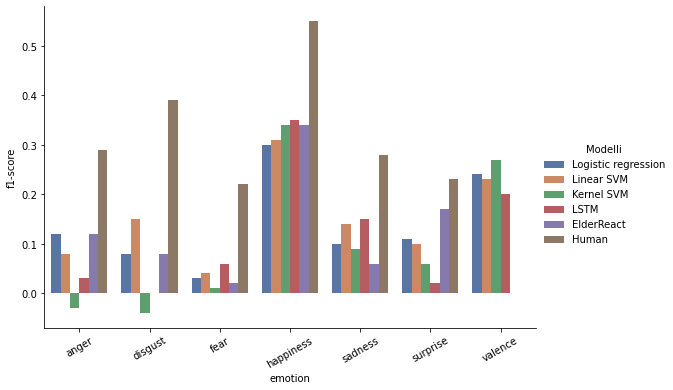

In [80]:
columns = ['anger','disgust','fear','happiness','sadness','surprise']
data = np.array([[0.12, 0.08, 0.02, 0.34, 0.06, 0.17]])
paper_df = pd.DataFrame(data=data, columns=columns, index=['ElderReact']).T
data = np.array([[0.29, 0.39, 0.22, 0.55, 0.28, 0.23]])
human_df = pd.DataFrame(data=data, columns=columns, index=['Human']).T

best_features_df = weighted_avg_df.loc[:,[('Logistic regression','au_activations'),('Linear SVM', 'au_intensities'),('Kernel SVM','au_activations'),('LSTM','au_intensities_activations')]]
all_models_df = pd.concat([best_features_df.droplevel(1, axis=1), paper_df, human_df], axis=1)
display(all_models_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}'))

melted_df = all_models_df.reset_index().rename(columns={'index':'emotion'}).melt(id_vars='emotion', var_name='Modelli', value_name='f1-score')
fg = sns.catplot(x='emotion', y='f1-score', hue='Modelli', kind='bar', palette='deep', data=melted_df, aspect=1.5)
fg.set_xticklabels(rotation=30)
plt.show()

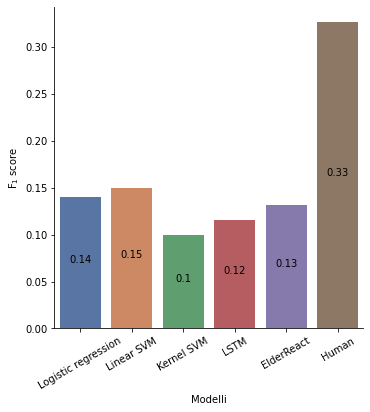

In [81]:
df = all_models_df.mean().to_frame().reset_index().rename(columns={'index':'Modelli', 0:r'F$_1$ score'})
fg = sns.catplot(x='Modelli', y=r'F$_1$ score', data=df, kind='bar', palette='deep')
fg.set_xticklabels(rotation=30)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fg.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [round(all_models_df.mean(), 2)[i] for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)

fg.savefig('/home/filippo/Downloads/cohen_kappa_scores.png', dpi=600)
plt.show()